<a href="https://colab.research.google.com/github/LM1997610/NN/blob/main/Digital_Epi_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:

from os import makedirs
from os.path import exists, join

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import re

In [38]:
with open('gdc_manifest.txt') as f:

    lines = [line.rstrip('\n').split("\t") for line in f][1:]

In [ ]:
data_folder = "data_folder"

if not exists(data_folder): makedirs(data_folder)

for file_id in tqdm(lines):

  data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id[0])

  response = requests.get(data_endpt, headers = {"Content-Type": "application/json"})

  # The file name can be found in the header within the Content-Disposition key.
  response_head_cd = response.headers["Content-Disposition"]

  file_name = re.findall("filename=(.+)", response_head_cd)[0]

  save_loc = join(data_folder, file_name)

  with open(save_loc, "wb") as output_file:

    output_file.write(response.content)

 47%|████▋     | 266/572 [04:01<04:32,  1.12it/s]

In [55]:
name = '00f54652-691e-4446-869a-4dd51c236f56.rna_seq.augmented_star_gene_counts.tsv'
data = pd.read_csv('data_folder/'+ name, sep='\t', header = 1)

altre_info = data.iloc[:4, :].dropna(axis=1)

data = data.iloc[4:, :].reset_index(drop=True)

data.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
0,ENSG00000000003.15,TSPAN6,protein_coding,1443,703,740,19.4123,8.0666,9.8630
1,ENSG00000000005.6,TNMD,protein_coding,3,3,0,0.1240,0.0515,0.0630
2,ENSG00000000419.13,DPM1,protein_coding,801,433,368,40.4957,16.8275,20.5750
3,ENSG00000000457.14,SCYL3,protein_coding,564,465,459,5.0002,2.0778,2.5405
4,ENSG00000000460.17,C1orf112,protein_coding,74,227,229,0.7564,0.3143,0.3843


In [3]:
clinical_data = pd.read_csv('clinical.tsv', sep='\t')
print(f"clinical_data.shape : {clinical_data.shape}")

clinical_data = clinical_data.replace("'--", np.nan).replace("not reported", np.nan).replace("Not Reported", np.nan)
clinical_data = clinical_data.dropna(axis=1, how="all")

print(f"clinical_data.shape : {clinical_data.shape}")

clinical_data.shape : (1010, 158)
clinical_data.shape : (1010, 31)


In [4]:
#clinical_data.iloc[0]

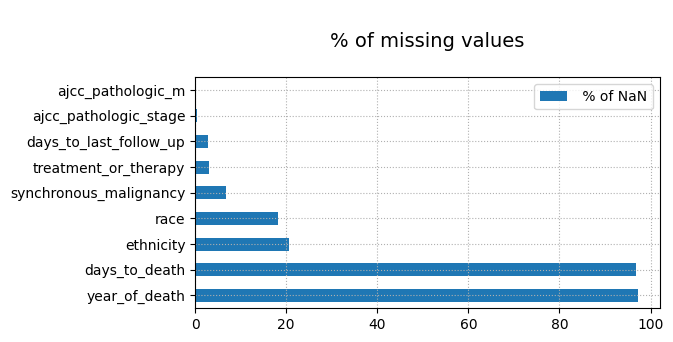

In [5]:
na_df = (clinical_data.isnull().sum() / len(clinical_data)) * 100
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending = False)
na_df = pd.DataFrame({' % of NaN' : na_df})
ax = na_df.plot(kind = "barh", figsize=(6,3))
ax.grid(linestyle = ':')
ax.set_title("\n% of missing values\n", fontsize=14);


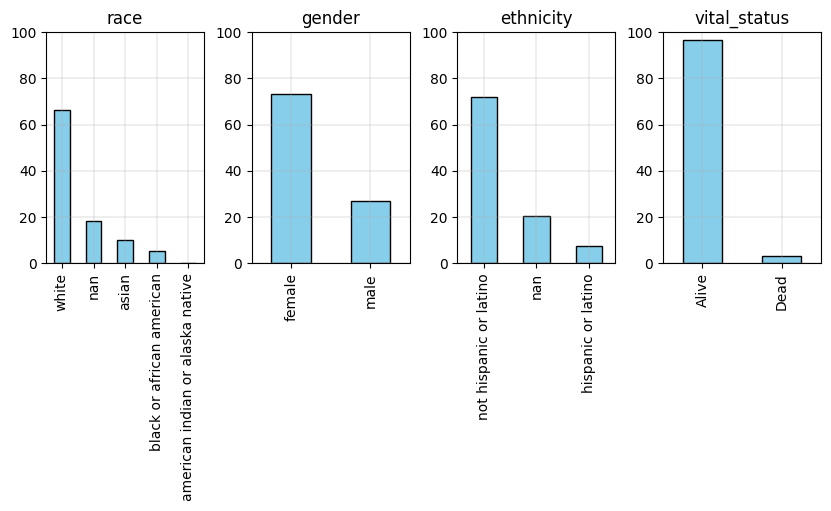

In [6]:
my_list = ["race", "gender", "ethnicity", "vital_status"]

fig, axes = plt.subplots(nrows=1, ncols=len(my_list), figsize=(10, 3))

for i in range(len(my_list)):
  values = clinical_data[my_list[i]].value_counts(dropna=False) / len(clinical_data) * 100
  #print(values, sum(values))
  values.plot(kind="bar", ax=axes[i], color='skyblue', edgecolor='black')
  axes[i].set_title(my_list[i])
  axes[i].set_ylim(0, 100)
  axes[i].grid(linewidth=0.3)

plt.subplots_adjust(wspace=0.3)
plt.show()

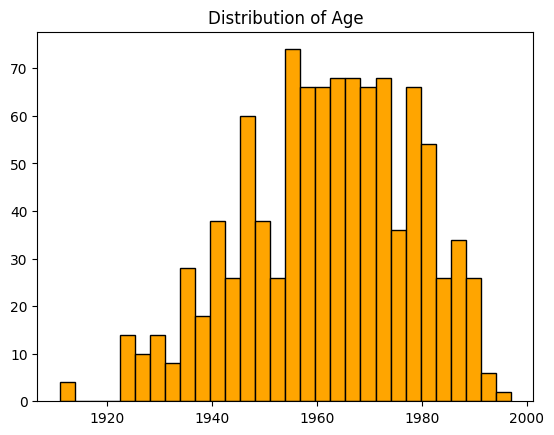

In [7]:
# Crea un istogramma della distribuzione dell'età
plt.hist(clinical_data["year_of_birth"], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Age')

plt.show()

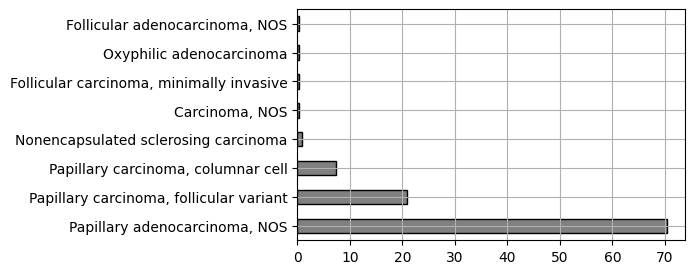

In [8]:
values = clinical_data["primary_diagnosis"].value_counts(dropna=False) / len(clinical_data) * 100
values.plot(kind="barh", color='gray', edgecolor='black', figsize=(5,3), grid=0.3);

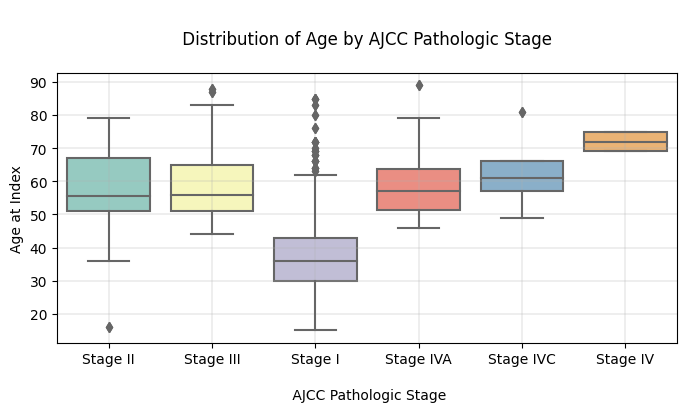

In [31]:
plt.figure(figsize=(8, 3.5))
sns.boxplot(x='ajcc_pathologic_stage', y='age_at_index', data=clinical_data, palette='Set3')

plt.title('\n Distribution of Age by AJCC Pathologic Stage \n')
plt.xlabel('\n AJCC Pathologic Stage')
plt.ylabel('Age at Index')
plt.grid(linewidth=0.3);